In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

from ckine.model import runIL2simple

changesAff = np.logspace(-2, 2, num=7)

Treg = np.array([4856., 183., 3178.])
Thelp = np.array([456., 46., 3392.])
NK = np.array([63., 3171., 1848.])

def dRespon_loc(input, recp): # same as dRespon except with different ILs range
        """ Calculate an IL2 dose response curve. """
        ILs = np.logspace(-4.0, 3.0)
        activee = np.array([runIL2simple(input, ii, recp) for ii in ILs])
        return ILs, activee

def plot_dResp_2Ra(recp, ax):
    """ Plots dose response curves for various IL2Ra affinities given a CD25 relative expression rate. """
    for i, itemA in enumerate(changesAff):
        ILs, BB = dRespon_loc([itemA, 1.0, 5.0], recp)
        ax.semilogx(ILs, BB, label=str(round(itemA, 2)))

    ax.set_ylabel('Active Receptor Complexes (#/cell)');
    ax.set_xlabel('IL2 [nM]');
    
def plot_dResp_2Rb(recp, ax):
    """ Plots dose response curves for various IL2Rb affinities given a CD25 relative expression rate. """
    for i, itemB in enumerate(changesAff):
        ILs, BB = dRespon_loc([1.0, itemB, 5.0], recp)
        ax.semilogx(ILs, BB, label=str(round(itemB, 2)))

    ax.set_ylabel('Active Receptor Complexes (#/cell)');
    ax.set_xlabel('IL2 [nM]');

def plot_dResp_2Rb_HIGH(recp, ax):
    """ Plots dose response curves for various IL2Rb affinities given a CD25 relative expression rate. """
    for i, itemB in enumerate(changesAff):
        ILs, BB = dRespon_loc([0.1, itemB, 5.0], recp)
        ax.semilogx(ILs, BB, label=str(round(itemB, 2)))

    ax.set_ylabel('Active Receptor Complexes (#/cell)');
    ax.set_xlabel('IL2 [nM]');

### Dose response when changing IL2Ra affinity alone

This plot shows how a CD25+ cell's dose-response behavior shifts when you increase the affinity of IL2 for IL2Ra. Lines with smaller Kd's correspond to higher binding affinity.

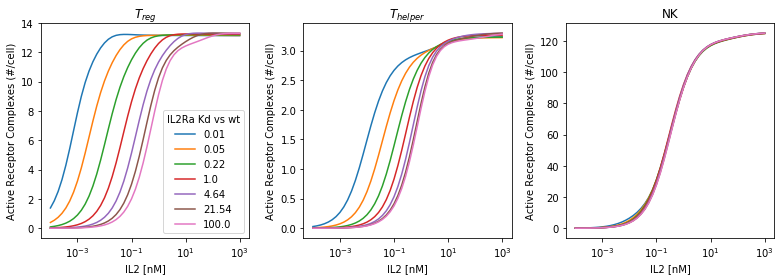

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(11, 4))
plot_dResp_2Ra(Treg, axs[0]);
axs[0].set_title(R'$T_{reg}$')
plot_dResp_2Ra(Thelp, axs[1]);
axs[1].set_title(R'$T_{helper}$')
plot_dResp_2Ra(NK, axs[2]);
axs[2].set_title("NK");
axs[0].legend(title="IL2Ra Kd vs wt");
fig.tight_layout()

### Dose response when changing IL2Rb affinity alone (for wt IL2Ra affinity)

This plot shows how a CD25+ cell's dose-response behavior shifts when you decrease the affinity of IL2 for IL2Rb. Lines with larger Kd's correspond to lower binding affinity.

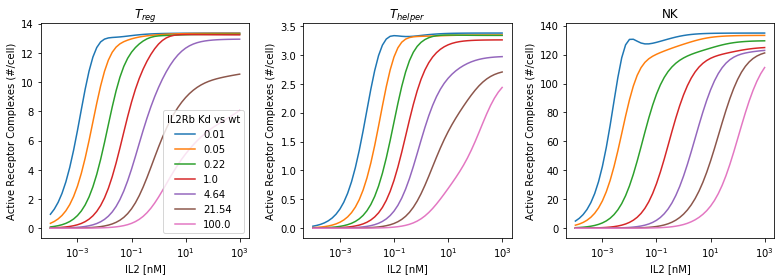

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(11, 4))
plot_dResp_2Rb(Treg, axs[0]);
axs[0].set_title(R'$T_{reg}$')
axs[0].legend(title="IL2Rb Kd vs wt");
plot_dResp_2Rb(Thelp, axs[1]);
axs[1].set_title(R'$T_{helper}$')
plot_dResp_2Rb(NK, axs[2]);
axs[2].set_title("NK");
fig.tight_layout()

### Dose response when changing IL2Rb affinity alone (for 10X higher IL2Ra affinity)

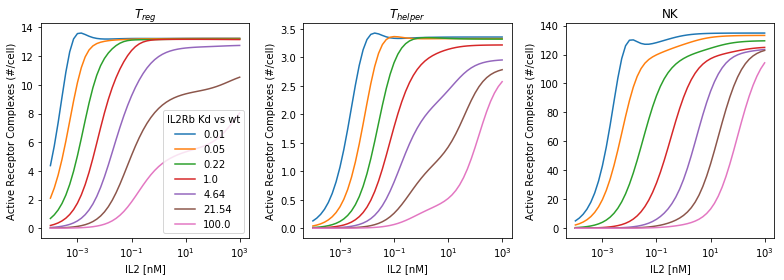

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(11, 4))
plot_dResp_2Rb_HIGH(Treg, axs[0]);
axs[0].set_title(R'$T_{reg}$')
axs[0].legend(title="IL2Rb Kd vs wt");
plot_dResp_2Rb_HIGH(Thelp, axs[1]);
axs[1].set_title(R'$T_{helper}$')
plot_dResp_2Rb_HIGH(NK, axs[2]);
axs[2].set_title("NK");
fig.tight_layout()